<a href="https://colab.research.google.com/github/cheryleugene88/skills-introduction-to-github/blob/main/AOL_Machine_Learning_Letter_Recognition_Project_UCI_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Models
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier # Pengganti CNN untuk data tabular
from sklearn.naive_bayes import GaussianNB

# Preprocessing & Metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [11]:
!wget https://archive.ics.uci.edu/static/public/59/letter+recognition.zip
!unzip letter+recognition.zipy

--2025-12-15 23:31:47--  https://archive.ics.uci.edu/static/public/59/letter+recognition.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘letter+recognition.zip’

letter+recognition.     [ <=>                ] 378.09K  1.91MB/s    in 0.2s    

2025-12-15 23:31:48 (1.91 MB/s) - ‘letter+recognition.zip’ saved [387167]

unzip:  cannot find or open letter+recognition.zipy, letter+recognition.zipy.zip or letter+recognition.zipy.ZIP.


In [12]:
!ls

letter-recognition.data   letter+recognition.zip
letter-recognition.names  sample_data


In [13]:
# Load the dataset
df = pd.read_csv('letter-recognition.data', header=None)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [15]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       20000 non-null  object
 1   1       20000 non-null  int64 
 2   2       20000 non-null  int64 
 3   3       20000 non-null  int64 
 4   4       20000 non-null  int64 
 5   5       20000 non-null  int64 
 6   6       20000 non-null  int64 
 7   7       20000 non-null  int64 
 8   8       20000 non-null  int64 
 9   9       20000 non-null  int64 
 10  10      20000 non-null  int64 
 11  11      20000 non-null  int64 
 12  12      20000 non-null  int64 
 13  13      20000 non-null  int64 
 14  14      20000 non-null  int64 
 15  15      20000 non-null  int64 
 16  16      20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


<Axes: >

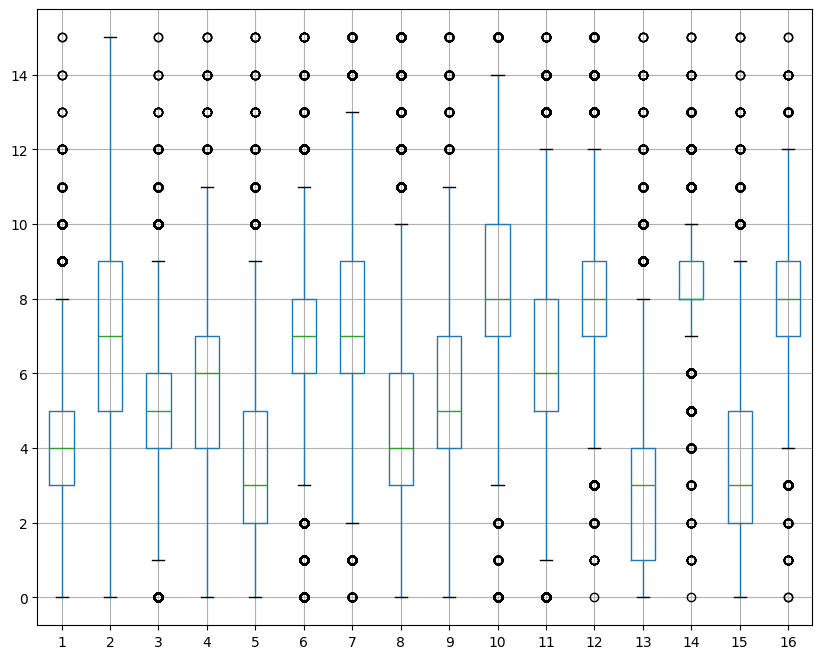

In [17]:
df.boxplot(figsize=(10,8))

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>,
        <Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>]],
      dtype=object)

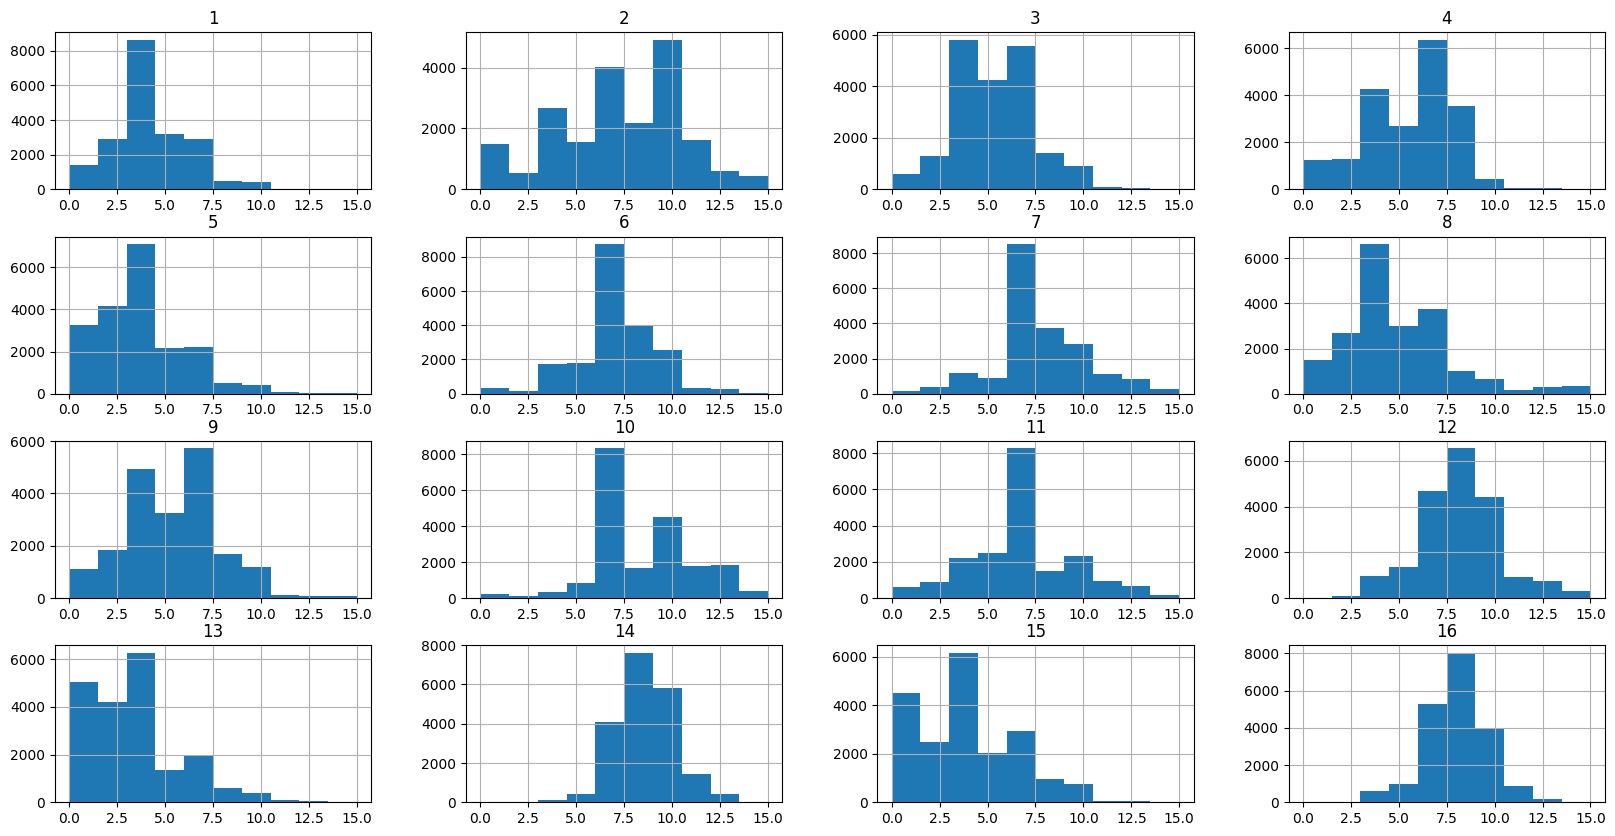

In [18]:
df.hist(figsize=(20,10))

## handle duplicate data

In [19]:
# Anggap 'df' adalah dataframe yang sudah di-load
# Cek jumlah duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat (persis): {duplicate_count}")

# Jika ingin MELIHAT data yang duplikat (opsional)
if duplicate_count > 0:
    print("\nContoh data duplikat:")
    # keep=False akan menampilkan semua baris yang kembar
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10))

# PROSES MENGHAPUS DUPLIKAT
# keep='first' artinya simpan 1, hapus sisanya.
df_clean = df.drop_duplicates(keep='first').reset_index(drop=True)

print(f"\nJumlah baris sebelum: {len(df)}")
print(f"Jumlah baris sesudah: {len(df_clean)}")
print(f"Total dihapus: {len(df) - len(df_clean)}")

# Update variabel df
df = df_clean

Jumlah baris duplikat (persis): 1332

Contoh data duplikat:
      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
6117   A   1   0   2   0   0   7   3   2   0   7   2   8   2   6   1   8
16857  A   1   0   2   0   0   7   3   2   0   7   2   8   2   6   1   8
1532   A   1   0   2   0   0   7   4   2   0   7   2   8   1   6   1   8
5752   A   1   0   2   0   0   7   4   2   0   7   2   8   1   6   1   8
3606   A   1   0   2   0   0   7   4   2   0   7   2   8   1   7   1   8
8575   A   1   0   2   0   0   7   4   2   0   7   2   8   1   7   1   8
13125  A   1   0   2   0   0   7   4   2   0   7   2   8   2   7   1   8
15651  A   1   0   2   0   0   7   4   2   0   7   2   8   2   7   1   8
19077  A   1   0   2   0   0   7   4   2   0   7   2   8   2   7   1   8
19595  A   1   0   2   0   0   7   4   2   0   7   2   8   2   7   1   8

Jumlah baris sebelum: 20000
Jumlah baris sesudah: 18668
Total dihapus: 1332


In [20]:
# Tentukan kolom fitur (semua kecuali target 'letter')
feature_cols = [col for col in df.columns if col != 0]

# Cek apakah ada fitur kembar tapi beda label
# subset=feature_cols artinya kita cuma cek duplikat di angka fiturnya saja
conflicting_dupes = df.duplicated(subset=feature_cols, keep=False)

# Filter baris yang punya fitur sama
conflicting_data = df[conflicting_dupes].sort_values(by=feature_cols)

# Cek apakah labelnya beda-beda?
# Kita group by fitur, lalu hitung ada berapa unique letter di grup itu
inconsistent_groups = conflicting_data.groupby(feature_cols)[0].nunique()
inconsistent_count = inconsistent_groups[inconsistent_groups > 1].count()

print(f"\nJumlah kasus data konflik (Fitur sama, Label beda): {inconsistent_count} grup")

# OPSI PENANGANAN:
# Cara paling aman untuk Conflicting Data adalah MENGHAPUS KEDUANYA
# karena kita tidak tahu mana label yang benar.
if inconsistent_count > 0:
    print("Menghapus data konflik...")
    # drop_duplicates dengan subset fitur dan keep=False akan menghapus SEMUA yang kembar
    # Hati-hati: ini menghapus semua entri yang fiturnya sama
    df_final = df.drop_duplicates(subset=feature_cols, keep=False).reset_index(drop=True)

    print(f"Jumlah data final bersih: {len(df_final)}")
    df = df_final
else:
    print("Tidak ada data konflik/inkonsisten.")


Jumlah kasus data konflik (Fitur sama, Label beda): 0 grup
Tidak ada data konflik/inkonsisten.


# Training data

In [21]:
# Split features and target variable
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Encoding target (A-Z -> 0-25) agar bisa masuk ke XGBoost/LGBM
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

# 3. Train/Test Split (Sesuai paper: 16k train, 4k test)
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, train_size=16000, random_state=42)

# 4. Scaling (Penting untuk SVM, KNN, MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM Classifier

In [22]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

### KNN Classifier

In [23]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

### Decision Tree Classifier

In [24]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

### Random Forest Classfier

In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

## Ensemble Tree Classfier

### XGBoost Classifier

In [26]:
xgb_model = XGBClassifier(
    n_estimators=200,       # jumlah pohon
    max_depth=6,            # kedalaman pohon
    learning_rate=0.1,      # step size
    subsample=0.8,          # sampling data
    colsample_bytree=0.8,   # sampling fitur
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9632683658170914


### LightGBM Classifier

In [27]:
lgbm_model = LGBMClassifier(
    n_estimators=200,
    max_depth=-1,           # -1 = tidak dibatasi
    learning_rate=0.1,
    num_leaves=31,          # jumlah daun per pohon
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 254
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 16
[LightGBM] [Info] Start training from score -3.200299
[LightGBM] [Info] Start training from score -3.250625
[LightGBM] [Info] Start training from score -3.263612
[LightGBM] [Info] Start training from score -3.215756
[LightGBM] [Info] Start training from score -3.244194
[LightGBM] [Info] Start training from score -3.200299
[LightGBM] [Info] Start training from score -3.245797
[LightGBM] [Info] Start training from score -3.275116
[LightGBM] [Info] Start training from score -3.598125
[LightGBM] [Info] Start training from score -3.261979
[LightGBM] [Info] Start training from score -3.255475
[LightGBM] [Info] Start training from score -3.359576


### Naive Bayes classifier

In [28]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)

### Deep learning MLP

In [29]:
# Import library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# --- 3. MLP Classifier ---
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # 2 hidden layers: 100 neuron & 50 neuron
    max_iter=500,                  # jumlah iterasi training
    activation='relu',             # fungsi aktivasi (default: relu)
    solver='adam',                 # optimizer (default: adam)
    random_state=42
)

mlp_model.fit(X_train, y_train)
mlp_predictions = mlp_model.predict(X_test)

# --- 4. Evaluasi ---
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("MLP Accuracy:", mlp_accuracy)

MLP Accuracy: 0.941904047976012


In [30]:
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Naive Bayes Accuracy:", nb_accuracy)
print("MLP (Deep learning) Accuracy:", mlp_accuracy)

SVM Accuracy: 0.921664167916042
KNN Accuracy: 0.9516491754122939
Decision Tree Accuracy: 0.8586956521739131
Random Forest Accuracy: 0.9632683658170914
XGBoost Accuracy: 0.9632683658170914
LightGBM Accuracy: 0.9703898050974513
Naive Bayes Accuracy: 0.633808095952024
MLP (Deep learning) Accuracy: 0.941904047976012


In [32]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline # Added import for Pipeline

# Define pipelines as per model_configs for consistency with hyperparameter tuning setup
# Note: StandardScaler and all model classes (SVC, KNeighborsClassifier, etc.) are already imported in the initial setup cell.

pipe_svm = Pipeline([('scaler', StandardScaler()), ('clf', svm.SVC(random_state=42))])
pipe_knn = Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
pipe_decision_tree = Pipeline([('clf', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('clf', RandomForestClassifier(random_state=42))])
pipe_xgb = Pipeline([('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))])
pipe_lgbm = Pipeline([('clf', LGBMClassifier(random_state=42, verbose=-1))])
pipe_nb = Pipeline([('scaler', StandardScaler()), ('clf', GaussianNB())])
pipe_mlp = Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier(max_iter=500, random_state=42))])


# 1. Siapkan Strategy CV (Stratified agar proporsi huruf A-Z seimbang tiap fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2. Masukkan semua model ke dalam Dictionary agar coding lebih rapi & tidak berulang
# Pastikan variabel model (pipe_svm, pipe_knn, dll) sudah didefinisikan sebelumnya
models = {
    "SVM": pipe_svm,
    "KNN": pipe_knn,
    "Decision Tree": pipe_decision_tree,
    "Random Forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "Naive Bayes": pipe_nb,
    "MLP (Deep Learning)": pipe_mlp
}

print(f"{'Model Name':<25} | {'CV Accuracy (Mean)':<20} | {'Stability (Std Dev)'}")
print("-" * 65)

# 3. Loop untuk menghitung score masing-masing
results = []
names = []

for name, model in models.items():
    # Menghitung 5 scores berbeda untuk setiap model
    # n_jobs=-1 artinya menggunakan semua core CPU agar lebih cepat
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

    # Simpan hasil untuk visualisasi nanti
    results.append(scores)
    names.append(name)

    # Print hasil format rapi
    print(f"{name:<25} | {scores.mean():.4f}               | +/- {scores.std():.4f}")

Model Name                | CV Accuracy (Mean)   | Stability (Std Dev)
-----------------------------------------------------------------
SVM                       | 0.9369               | +/- 0.0014
KNN                       | 0.9354               | +/- 0.0019
Decision Tree             | 0.8534               | +/- 0.0032
Random Forest             | 0.9554               | +/- 0.0036
XGBoost                   | 0.9535               | +/- 0.0025
LightGBM                  | 0.9579               | +/- 0.0030
Naive Bayes               | 0.6346               | +/- 0.0042
MLP (Deep Learning)       | 0.9429               | +/- 0.0033


## Hyperparameter tuning

### SVM Classifier

In [34]:
model_configs = [] # Initialize the list
model_configs.append({
    'name': 'SVM',
    'pipeline': Pipeline(
        [('scaler', StandardScaler()),
         ('clf', SVC())
        ]),
    'param_grid': {
        'clf__C': [1, 10, 100],            # C besar = penalty kesalahan tinggi (lebih ketat)
        'clf__gamma': ['scale', 0.1, 0.01], # Gamma mengatur jangkauan pengaruh data training
        'clf__kernel': ['rbf']             # RBF biasanya terbaik untuk Letter Recognition
    }
})

### KNN Classifier

In [35]:
model_configs.append({
    'name': 'KNN',
    'pipeline': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ]),
    'param_grid': {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'], # Distance memberi bobot lebih pada tetangga terdekat
        'clf__p': [1, 2] # 1=Manhattan, 2=Euclidean
    }
})

### Decision Tree Classifier

In [36]:
# Hati-hati overfit, mainkan max_depth
model_configs.append({
    'name': 'Decision Tree',
    'pipeline': Pipeline([
        ('clf', DecisionTreeClassifier(random_state=42))
    ]),
    'param_grid': {
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__criterion': ['gini', 'entropy']
    }
})

### Random Forest Classifier

In [37]:
# n_estimators semakin banyak semakin bagus (tapi lambat)
model_configs.append({
    'name': 'Random Forest',
    'pipeline': Pipeline([
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    'param_grid': {
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [None, 20],
        'clf__min_samples_split': [2, 5]
    }
})

### XGBoost Classifier

In [38]:
# Model berat, gridnya kita buat efisien
model_configs.append({
    'name': 'XGBoost',
    'pipeline': Pipeline([
        ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
    ]),
    'param_grid': {
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [3, 6, 10]
    }
})

### LightGBM Classifier

In [39]:
# Biasanya lebih cepat dari XGBoost
model_configs.append({
    'name': 'LightGBM',
    'pipeline': Pipeline([
        ('clf', LGBMClassifier(random_state=42, verbose=-1))
    ]),
    'param_grid': {
        'clf__learning_rate': [0.05, 0.1],
        'clf__n_estimators': [100, 200],
        'clf__num_leaves': [31, 50] # Penting untuk LightGBM
    }
})

### Naive Bayes Classifier

In [40]:
# NB Gaussian tidak banyak parameter tuningnya
model_configs.append({
    'name': 'Naive Bayes',
    'pipeline': Pipeline([
        ('scaler', StandardScaler()), # Kadang scaling membantu GaussianNB konvergen
        ('clf', GaussianNB())
    ]),
    'param_grid': {
        'clf__var_smoothing': [1e-9, 1e-8, 1e-7] # Menangani stabilitas numerik
    }
})

### MLP (Deep Learning) Classifier

In [44]:
# Ini akan PALING LAMA. Kita batasi grid-nya.
model_configs.append({
    'name': 'MLP (Deep Learning)',
    'pipeline': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', MLPClassifier(max_iter=500, random_state=42))
    ]),
    'param_grid': {
        'clf__hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
        'clf__activation': ['relu', 'tanh'],
        'clf__alpha': [0.0001, 0.001] # Regularization term
    }
})

In [45]:
from sklearn.model_selection import GridSearchCV

best_models = {} # Untuk menyimpan model terbaik hasil tuning

print("Mulai Hyperparameter Tuning...")
print("Catatan: Proses ini bisa memakan waktu 30-60 menit tergantung spesifikasi komputer Anda.")
print("="*60)

for config in model_configs:
    name = config['name']
    pipeline = config['pipeline']
    params = config['param_grid']

    print(f"\nSedang tuning: {name}...")

    # Setup GridSearchCV
    # cv=3 untuk mempercepat proses tuning (standar riset biasanya 5)
    # n_jobs=-1 artinya pakai SEMUA core CPU yang tersedia (Paralel)
    grid = GridSearchCV(pipeline, params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

    # Fit data train
    grid.fit(X_train, y_train)

    # Simpan hasil
    best_models[name] = grid.best_estimator_

    print(f"  -> Best Params: {grid.best_params_}")
    print(f"  -> Best CV Accuracy: {grid.best_score_:.4f}")

print("\n" + "="*60)
print("Tuning Selesai!")

Mulai Hyperparameter Tuning...
Catatan: Proses ini bisa memakan waktu 30-60 menit tergantung spesifikasi komputer Anda.

Sedang tuning: SVM...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
  -> Best Params: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
  -> Best CV Accuracy: 0.9646

Sedang tuning: KNN...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
  -> Best Params: {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'distance'}
  -> Best CV Accuracy: 0.9412

Sedang tuning: Decision Tree...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
  -> Best Params: {'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__min_samples_split': 2}
  -> Best CV Accuracy: 0.8477

Sedang tuning: Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  -> Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
  -> Best CV Accuracy: 0.9525

Sedang tuning: XGBoost...
Fitting 3 folds for eac

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [23:56:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  -> Best Params: {'clf__learning_rate': 0.2, 'clf__max_depth': 6, 'clf__n_estimators': 200}
  -> Best CV Accuracy: 0.9502

Sedang tuning: LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
  -> Best Params: {'clf__learning_rate': 0.1, 'clf__n_estimators': 200, 'clf__num_leaves': 31}
  -> Best CV Accuracy: 0.9591

Sedang tuning: Naive Bayes...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
  -> Best Params: {'clf__var_smoothing': 1e-09}
  -> Best CV Accuracy: 0.6364

Sedang tuning: MLP (Deep Learning)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
  -> Best Params: {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100, 50)}
  -> Best CV Accuracy: 0.9500

Sedang tuning: MLP (Deep Learning)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
  -> Best Params: {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100, 50)}
  -> Best CV Accuracy: 0.9500

Tuning Selesai!


## Evaluation

=== DETAIL CLASSIFICATION REPORT ===

Model: SVM
------------------------------
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       104
           B       0.96      0.97      0.96       110
           C       0.99      0.97      0.98        98
           D       0.94      0.97      0.96       118
           E       0.98      0.96      0.97       101
           F       0.94      0.99      0.97       100
           G       0.97      0.97      0.97       120
           H       0.93      0.96      0.95        99
           I       0.96      0.95      0.96        86
           J       1.00      0.97      0.99       102
           K       0.99      0.96      0.97       101
           L       0.98      0.97      0.98       117
           M       1.00      1.00      1.00        92
           N       0.98      0.98      0.98        91
           O       0.97      1.00      0.99        99
           P       0.99      0.97      0.98       117
 

/tmp/ipython-input-3772135649.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro F1-Score', y='Model', data=df_results, palette='viridis')


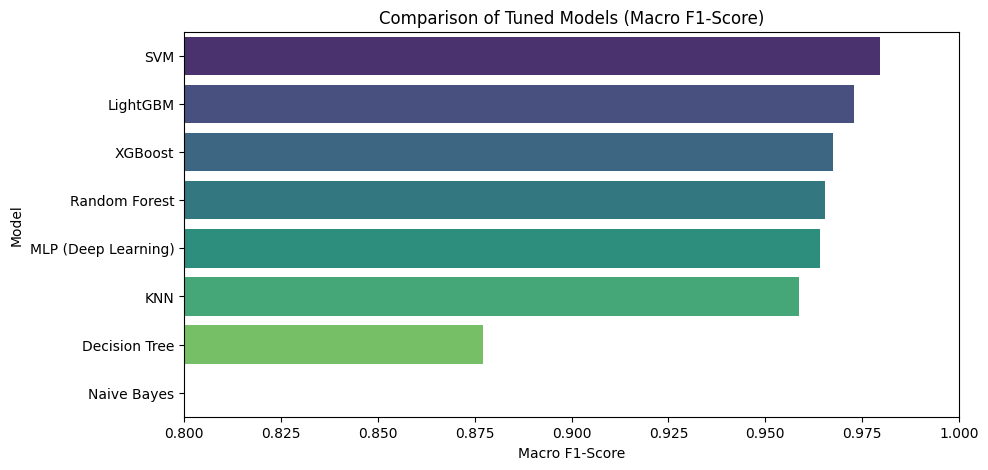

In [46]:
# Wadah untuk menyimpan skor akhir
final_results = []

print("=== DETAIL CLASSIFICATION REPORT ===")

for name, model in best_models.items():
    print(f"\nModel: {name}")
    print("-" * 30)

    # 1. Prediksi
    y_pred = model.predict(X_test)

    # 2. Hitung Metrik
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')

    # 3. Simpan ke list
    final_results.append({
        'Model': name,
        'Accuracy': acc,
        'Macro F1-Score': f1_macro
    })

    # 4. Print Report (Target names menggunakan A-Z dari LabelEncoder)
    # Pastikan variable 'le' dari tahap preprocessing masih ada
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# --- Buat DataFrame Perbandingan ---
df_results = pd.DataFrame(final_results).sort_values(by='Macro F1-Score', ascending=False)

print("\n=== FINAL LEADERBOARD (Sorted by F1-Score) ===")
print(df_results)

# Visualisasi Bar Chart Perbandingan F1 Score
plt.figure(figsize=(10, 5))
sns.barplot(x='Macro F1-Score', y='Model', data=df_results, palette='viridis')
plt.title('Comparison of Tuned Models (Macro F1-Score)')
plt.xlim(0.8, 1.0) # Zoom in range 80%-100% biar perbedaan terlihat
plt.show()

Menampilkan Confusion Matrix untuk Model Terbaik: SVM


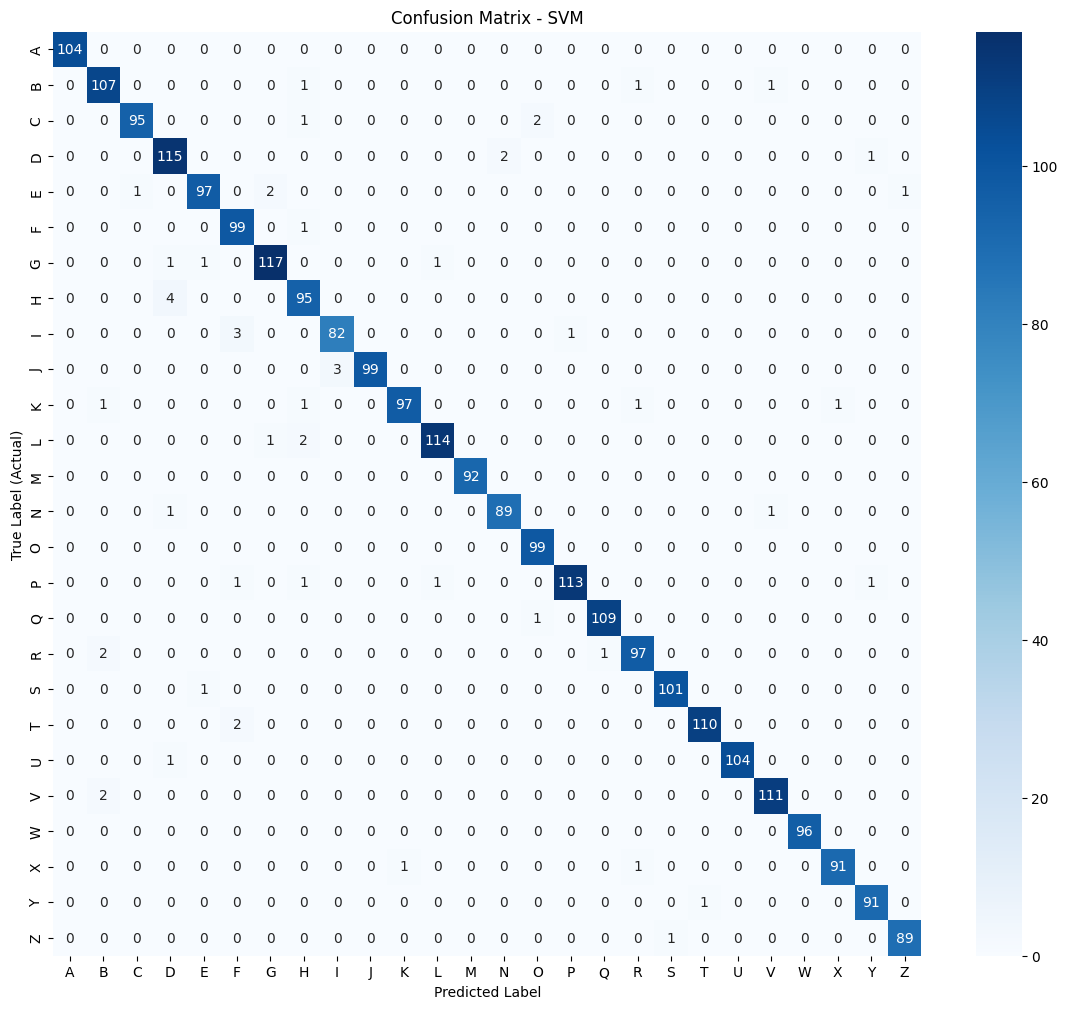

In [59]:
def plot_confusion_matrix(model_name, model_object, X_test, y_test, classes):
    """
    Fungsi custom untuk plot confusion matrix 26x26 yang rapi
    """
    y_pred = model_object.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(14, 12)) # Ukuran besar agar huruf terbaca
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)

    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label (Actual)')
    plt.xlabel('Predicted Label')
    plt.show()

# CONTOH PENGGUNAAN:
# Ganti 'XGBoost' dengan nama model lain yang ada di best_models (misal 'SVM', 'Random Forest')
# Kita ambil model terbaik (urutan pertama di leaderboard)
best_model_name = df_results.iloc[0]['Model']
best_model_obj = best_models[best_model_name]

print(f"Menampilkan Confusion Matrix untuk Model Terbaik: {best_model_name}")
plot_confusion_matrix(best_model_name, best_model_obj, X_test, y_test, le.classes_)

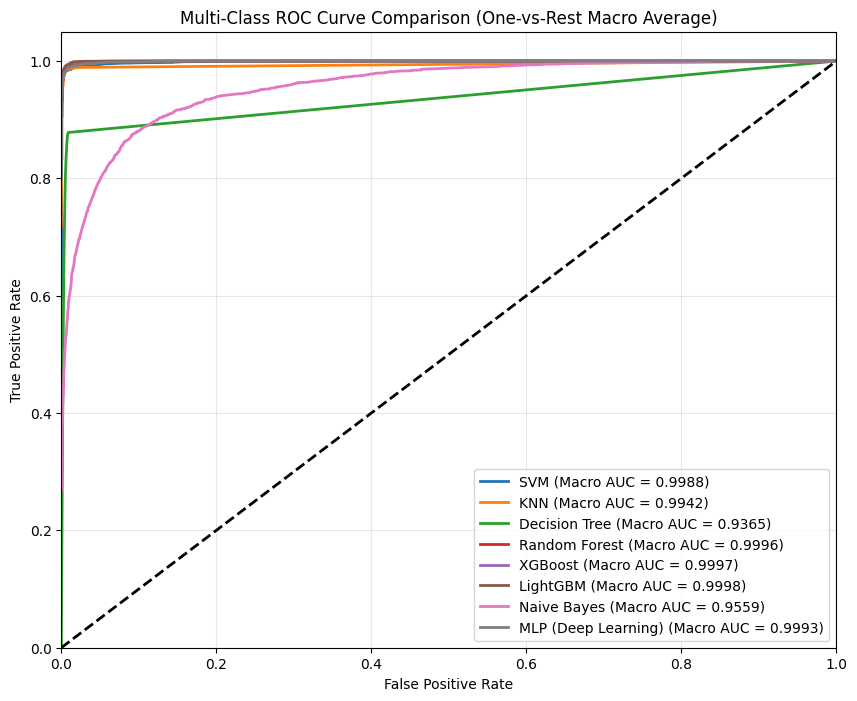

In [48]:
# 1. Binarize Label Test (Ubah y_test jadi format One-Hot Encoding)
# Bentuknya jadi matriks (n_samples, 26) berisi 0 dan 1
n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=range(n_classes))

plt.figure(figsize=(10, 8))

# 2. Loop untuk setiap model
for name, model in best_models.items():

    # Cek apakah model support probability
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"): # Untuk SVM jika probability=False
        y_score = model.decision_function(X_test)
    else:
        print(f"Model {name} tidak support probability scores, skip ROC.")
        continue

    # 3. Hitung ROC untuk setiap kelas, lalu ambil rata-rata (Macro Average)
    # Ini teknik standar untuk menyederhanakan plot multi-class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute Macro-Average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes
    macro_auc = auc(all_fpr, mean_tpr)

    # 4. Plot Garis Model Tersebut
    plt.plot(all_fpr, mean_tpr,
             label=f'{name} (Macro AUC = {macro_auc:.4f})',
             linewidth=2)

# Dekorasi Plot
plt.plot([0, 1], [0, 1], 'k--', lw=2) # Garis diagonal random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve Comparison (One-vs-Rest Macro Average)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

###